In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic') 
print (plt.rcParams['font.family'] )

['NanumGothic']


# B지역 전처리

In [3]:
B_air = pd.read_csv("B측정소_기상자료(1hr)_2021년.csv", encoding='euc-kr')
B_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지역             8759 non-null   object 
 1   일시             8759 non-null   object 
 2   기온(°C)         8396 non-null   float64
 3   습도(%)          8396 non-null   float64
 4   풍속(m/s)        8396 non-null   float64
 5   풍향(360°)       8396 non-null   float64
 6   일사량(w/㎡)       8396 non-null   float64
 7   PM10(㎍/㎥)      8283 non-null   float64
 8   PM2.5(㎍/㎥)     8035 non-null   float64
 9   오존(ppm)        8325 non-null   float64
 10  증기압(hPa)       8759 non-null   float64
 11  현지기압(hPa)      8759 non-null   float64
 12  지면온도(°C)       8759 non-null   float64
 13  30cm 지중온도(°C)  8759 non-null   float64
 14  강수량(mm)        8759 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.0+ MB


In [4]:
B_area = pd.read_csv("B관측소_시간별_민원발생건수.csv", encoding='euc-kr')
B_area.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NO      130 non-null    int64 
 1   발생일자    130 non-null    object
 2   시간      130 non-null    object
 3   주소      130 non-null    object
 4   발생건수    130 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 5.2+ KB


In [5]:
def f(row):
    if 0<row['풍향(360°)']<=45:
        row['방향'] = '북동풍'
    elif 45<row['풍향(360°)']<=90:
        row['방향'] = '동풍'
    elif 90<row['풍향(360°)']<=135:
        row['방향'] = '남동풍'
    elif 135<row['풍향(360°)']<=180:
        row['방향'] = '남풍'
    elif 180<row['풍향(360°)']<=225:
        row['방향'] = '남서풍'
    elif 225<row['풍향(360°)']<=270:
        row['방향'] = '서풍'
    elif 270<row['풍향(360°)']<=315:
        row['방향'] = '북서풍'
    else:
        row['방향'] = '북풍'
    return row['방향']
#train['start_turn'] = train.apply(f, axis=1)
#A_air['방향'] = A_air.apply(f, axis=1)

In [6]:
B_air = B_air.dropna(subset = ['풍향(360°)'])
B_air['풍향(360°)'] = B_air['풍향(360°)'].astype(int)
B_air['방향'] = B_air.apply(f, axis=1)

In [7]:
B_air.groupby('방향')['지역'].count()

방향
남동풍     728
남서풍     484
남풍      779
동풍     1628
북동풍    1440
북서풍     959
북풍     1381
서풍      997
Name: 지역, dtype: int64

In [8]:
B_air['월'] = B_air['일시'].astype(str).str[5:7]
B_air['일'] = B_air['일시'].astype(str).str[8:11]
B_air['시'] = B_air['일시'].astype(str).str[10:13]

In [9]:
B_air['시'] = B_air['시'].str.replace(':', '')
B_air['시'] = B_air['시'].str.zfill(2)

In [10]:
B_area['시간'].astype(str).str[0:2]

0      21
1      19
2      20
3      10
4      18
       ..
125    19
126    21
127    14
128    22
129    19
Name: 시간, Length: 130, dtype: object

In [11]:
B_area['월'] = B_area['발생일자'].astype(str).str[5:7]
B_area['일'] = B_area['발생일자'].astype(str).str[8:11]
B_area['시'] = B_area['시간'].astype(str).str[0:2]

In [12]:
B_area['시'] = B_area['시'].str.replace(':', '')

In [13]:
B_area['월'] = B_area['월'].astype(int)
B_area['일'] = B_area['일'].astype(int)
B_area['시'] = B_area['시'].astype(int)

In [14]:
B_air['월'] = B_air['월'].astype(int)
B_air['일'] = B_air['일'].astype(int)
B_air['시'] = B_air['시'].astype(int)

In [15]:
B_area

,NO,발생일자,시간,주소,발생건수,월,일,시
0,1,2021-01-28,21:22,석봉동,1,1,28,21
1,2,2021-02-15,19:13,석봉동,1,2,15,19
2,3,2021-02-16,20:15,석봉동,1,2,16,20
3,4,2021-02-22,10:40,석봉동,1,2,22,10
4,5,2021-03-10,18:33,목상동,1,3,10,18
...,...,...,...,...,...,...,...,...
125,126,2021-11-08,19:48,석봉동,1,11,8,19
126,127,2021-11-10,21:05,석봉동,1,11,10,21
127,128,2021-11-22,14:50,석봉동,1,11,22,14
128,129,2021-12-06,22:51,문평동,1,12,6,22


In [16]:
B_df = pd.merge(B_air, B_area, on = ['월', '일','시'], how = "left")

In [17]:
B_df = B_df.drop(['발생일자', '시간','주소','NO'], axis = 1)

In [18]:
B_df = B_df.fillna(0)

In [19]:
B_df

,지역,일시,기온(°C),습도(%),풍속(m/s),풍향(360°),일사량(w/㎡),PM10(㎍/㎥),PM2.5(㎍/㎥),오존(ppm),증기압(hPa),현지기압(hPa),지면온도(°C),30cm 지중온도(°C),강수량(mm),방향,월,일,시,발생건수
0,B,2021-01-01 1:00,-8.4,89.4,1.6,49,1.1,40.0,22.0,0.002,3.0,1018.9,-6.5,3.0,0.0,동풍,1,1,1,0.0
1,B,2021-01-01 2:00,-8.3,88.3,0.9,46,1.1,44.0,18.0,0.002,3.0,1019.2,-6.8,2.9,0.0,동풍,1,1,2,0.0
2,B,2021-01-01 3:00,-8.6,87.4,0.8,40,1.1,42.0,23.0,0.002,2.9,1019.5,-7.1,2.9,0.0,북동풍,1,1,3,0.0
3,B,2021-01-01 4:00,-9.2,87.8,1.3,47,1.1,40.0,18.0,0.002,2.8,1019.5,-7.3,2.8,0.0,동풍,1,1,4,0.0
4,B,2021-01-01 5:00,-9.1,87.3,0.3,53,1.1,44.0,23.0,0.002,2.8,1019.0,-7.6,2.9,0.0,동풍,1,1,5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8409,B,2021-12-31 19:00,-3.9,46.3,0.8,343,1.1,23.0,1.0,0.029,1.9,1023.4,-3.9,2.3,0.0,북풍,12,31,19,0.0
8410,B,2021-12-31 20:00,-4.4,48.8,0.7,273,1.1,21.0,3.0,0.029,2.0,1023.7,-4.7,2.3,0.0,북서풍,12,31,20,0.0
8411,B,2021-12-31 21:00,-5.1,52.0,0.5,359,1.1,22.0,9.0,0.019,2.0,1023.5,-5.4,2.3,0.0,북풍,12,31,21,0.0
8412,B,2021-12-31 22:00,-5.9,61.6,0.5,278,1.1,19.0,12.0,0.016,2.1,1023.9,-6.0,2.3,0.0,북서풍,12,31,22,0.0


# C지역 전처리

In [20]:
C_air = pd.read_csv("C측정소_기상자료(1hr)_2021년.csv", encoding='euc-kr')
C_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지역             8759 non-null   object 
 1   일시             8759 non-null   object 
 2   기온(°C)         8751 non-null   float64
 3   습도(%)          8751 non-null   float64
 4   풍속(m/s)        8751 non-null   float64
 5   풍향(360°)       8751 non-null   float64
 6   일사량(w/㎡)       8753 non-null   float64
 7   PM10(㎍/㎥)      8597 non-null   float64
 8   PM2.5(㎍/㎥)     8546 non-null   float64
 9   오존(ppm)        8657 non-null   float64
 10  증기압(hPa)       8759 non-null   float64
 11  현지기압(hPa)      8759 non-null   float64
 12  지면온도(°C)       8759 non-null   float64
 13  30cm 지중온도(°C)  8759 non-null   float64
 14  강수량(mm)        8759 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.0+ MB


In [21]:
C_area = pd.read_csv("C관측소_시간별_민원발생건수.csv", encoding='euc-kr')
C_area.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NO      33 non-null     int64 
 1   발생일자    33 non-null     object
 2   시간      33 non-null     object
 3   주소      33 non-null     object
 4   발생건수    33 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1.4+ KB


In [22]:
C_air = C_air.dropna(subset = ['풍향(360°)'])
C_air['풍향(360°)'] = C_air['풍향(360°)'].astype(int)
C_air['방향'] = C_air.apply(f, axis=1)

In [23]:
C_air['월'] = C_air['일시'].astype(str).str[5:7]
C_air['일'] = C_air['일시'].astype(str).str[8:11]
C_air['시'] = C_air['일시'].astype(str).str[10:13]

In [24]:
C_air['시'] = C_air['시'].str.replace(':', '')
C_air['시'] = C_air['시'].str.zfill(2)

In [25]:
B_area['시간'].astype(str).str[0:2]

0      21
1      19
2      20
3      10
4      18
       ..
125    19
126    21
127    14
128    22
129    19
Name: 시간, Length: 130, dtype: object

In [26]:
C_area['월'] = C_area['발생일자'].astype(str).str[5:7]
C_area['일'] = C_area['발생일자'].astype(str).str[8:11]
C_area['시'] = C_area['시간'].astype(str).str[0:2]

In [27]:
C_area['시'] = C_area['시'].str.replace(':', '')
C_area['월'] = C_area['월'].astype(int)
C_area['일'] = C_area['일'].astype(int)
C_area['시'] = C_area['시'].astype(int)
C_air['월'] = C_air['월'].astype(int)
C_air['일'] = C_air['일'].astype(int)
C_air['시'] = C_air['시'].astype(int)

In [28]:
C_df = pd.merge(C_air,C_area, on = ['월', '일','시'], how = "left")

In [29]:
C_df = C_df.drop(['발생일자', '시간','주소','NO'], axis = 1)

In [30]:
C_df = C_df.fillna(0)

In [31]:
g = C_df.groupby(["방향"])["발생건수"].sum().sort_values(ascending = False)

<AxesSubplot:xlabel='방향'>

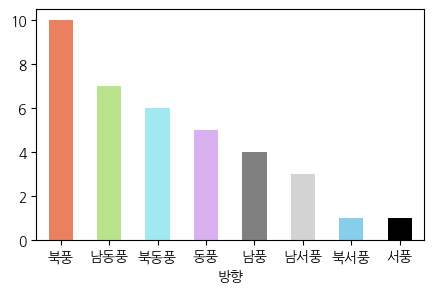

In [32]:
g.plot.bar(rot=0, figsize = (5,3),color= ["#eb8060", "#b9e38d", "#a1e9f0", "#d9b1f0" ,"gray", "lightgray", "skyblue", "black"])